# Sklearn Introduction

Import necessary modules

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

We'll use sklearn, whose routines involve four steps:

1. Instantiate a model
2. Produce a fit
3. Predict an outcome
4. Score the fit

Machine learning algorithms can be either supervised or unsupervised:

* Supervised may involve regression if the variable is continuous or classification if the variable is discrete

* Unsupervised algorithms involve unlabeled data

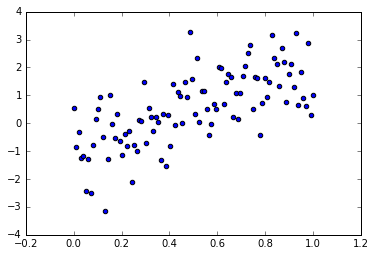

In [2]:
N = 100
x = np.linspace(0,1,N)
y = 3.3*x -1.01 + np.random.randn(N) # linear response variable with noise
plt.scatter(x,y);

#### 1. Linear Regression

**Instantiate** by means of a least squares regression contained in the sklearn.linear_model module:

In [3]:
from sklearn.linear_model import LinearRegression

LinearRegression is a 'class' -- calling it returns an object

In [4]:
reg = LinearRegression()

Input models are expected to be 2D arrays for the training data:
* samples go down the rows
* features go down the columns

We need to reshape our input arrays before passing them through the fit!

In [5]:
reg.fit(x.reshape(N,1),y.reshape(N,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Note to self: variable.function(args) seems to be the syntax for manipulating an object directly!

For instance, now that the model has been fit we can use the 'coef' and 'intercept' attributes:

In [6]:
print 'This is what we get:', reg.coef_[0][0], 'x + (', reg.intercept_[0],')'

This is what we get: 3.03198265874 x + ( -0.951644937069 )


Question: What are the [] indexing in these attributes?

**Predict** by making a new array of x values and using our model's predict method to compute new y values.

In [7]:
X = np.linspace(0,1,10)
Y = reg.predict(X.reshape(10,1))

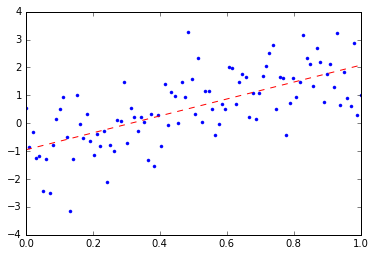

In [8]:
plt.plot(x,y,'b.',X,Y,'r--');

Connect to stats: In this bivariate graph an increase in X goes with an increase in Y. Therefore we can say that the data sets are correlated. This makes sense because Y was obtained from our regression model!

** Score ** In this case we used all the data to build the model. It is bad practice to test the model with the data used to build the model! (It violates Bayesian probability). So from now on, we will split the input data into a *training* set and a *testing* set.

#### 2. Decision TreeRegressor

To make matters more interesting, we will use a different model on the same data set. Will it be a better fit?

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
clf = DecisionTreeRegressor() # Instantiate the model

In [14]:
clf.fit(x.reshape(N,1),y.reshape(N,1)) # Fit the model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

I wonder what these default settings are. Should I even care?

In [15]:
X = np.linspace(0,1,100)
Y = clf.predict(X.reshape(100,1)) # Predict with the model

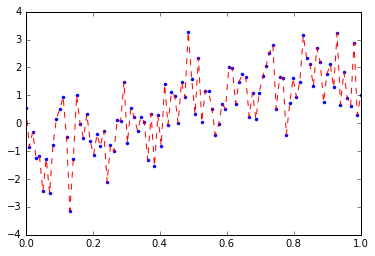

In [17]:
plt.plot(x,y,'b.',X,Y,'r--');

We'll come back later to discuss what Decision trees are and what they are meant to model (phew!), but for now let's just recognize that our model is **overfitting** the data set. By this we mean that it's paying too much attention to the noise -- it's not averaging over anything really, it's just 'connecting the dots.'

#### 3. Built-in datasets

Three sample datasets are stored in the sklearn.datasets module and packaged as a Bunch object. A 'bunch' object is a type of dictionary that is accesible by dot syntax.

The diabetes dataset describes the following information:

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

In [18]:
from sklearn.datasets import load_diabetes

In [19]:
diabeetus = load_diabetes()

The load_diabetes function returns a dictionary type object. We can look what's inside using the keys method:

In [20]:
diabeetus.keys()

['data', 'target']

In [27]:
diabeetus.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

Note that the ':5' notation is part of the following possible ways to slice data:

* a[start:end] -> from start to end-1
* a[start:] -> from start through the rest of the array
* a[:end] -> from the beginning through end-1
* a[:] -> NOT THE WHOLE THING!

In [28]:
diabeetus.target[:5]

array([ 151.,   75.,  141.,  206.,  135.])

In [29]:
names = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']

Now we'll do some pandas stuff.

In [31]:
df = pd.DataFrame(diabeetus.data,columns=names)

In [32]:
df['Y'] = diabeetus.target.reshape(len(diabeetus.target),1)

In [33]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


Oh wow! Soooo easy. So no more need for Excel, eh?

In addition, we shall consider the scatter_matrix function, which will allow us to visualize a DataFrame

In [34]:
from pandas.tools.plotting import scatter_matrix

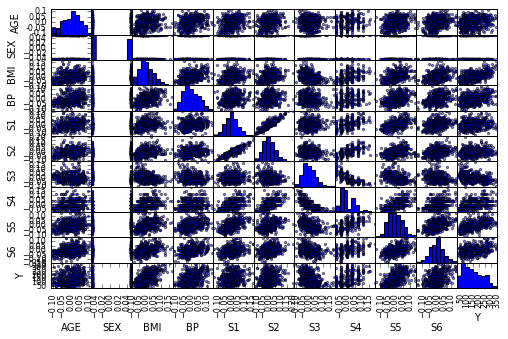

In [39]:
scatter_matrix(df,figsize=(8,5));

We'll finish this session by carrying out a linear regression with the data.

In [40]:
reg_diabeetus = LinearRegression()

In [41]:
reg_diabeetus.fit(diabeetus.data,diabeetus.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
reg_diabeetus.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [44]:
reg_diabeetus.intercept_

152.13348416289651

Once more, we used all the data to fit the model and there's not testing data. This is what we shall begin to do next time.